# R 프로그래밍

> "작성 중"

- toc: true
- branch: master
- badges: true
- comments: true
- author: 한재수
- categories: [R]

참고: R 프로그래밍 - 허명회 지음

`-` R 프로그래밍에 대해 복습할 겸 간단히 정리 + 파이썬에서 할 필요없이 그냥 처음부터 R로 만들었으면 됐음......

# 2장 - 벡터(vector)
`-` 데이터 컨테이너의 기본형

## 벡터

In [4]:
#hide
import os
os.environ['R_HOME']='C:/anaconda3/envs/py38r40/lib/R' 

In [5]:
import rpy2
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [2]:
%%R
x <- 1
is.vector(x)

[1] TRUE


`-` x는 `길이가 1인 벡터 = 스칼라`

In [6]:
%%R 
print(pi)
print(pi, 16)

[1] 3.141593
[1] 3.141592653589793


`-` π는 숫자가 예약되어 있는 스칼라

In [10]:
%%R
M <- matrix(1:12, nrow = 4, ncol = 3, byrow = T)
M

     [,1] [,2] [,3]
[1,]    1    2    3
[2,]    4    5    6
[3,]    7    8    9
[4,]   10   11   12


`-` M은 행렬 ---> 벡터의 2차원 배열

## 인덱싱 

In [18]:
%%R
f <- c(1, 1, 2, 3, 5, 8, 13, 21)
f[5]

[1] 5


In [20]:
%%R
f[1:5]

[1] 1 1 2 3 5


In [21]:
%%R
f[-c(1,4)]

[1]  1  2  5  8 13 21


In [22]:
%%R
f[c(1,2,4)]

[1] 1 1 3


## seq()와 rep() 함수
`-` seq(a, b, by = c)는 a부터 b까지 c간격으로 등차수열 생성

In [23]:
%%R
seq(0, 10, 2.5)

[1]  0.0  2.5  5.0  7.5 10.0


`-`  seq(a, b, length = n)는 a부터 b까지 길이가 n인 일정 간격 수열을 생성

In [25]:
%%R
seq(0, 10, length = 11)

 [1]  0  1  2  3  4  5  6  7  8  9 10


`-` rep(x, times = k)는 x의 각 요소가 k의 각 요소씩 반복된 벡터

In [27]:
%%R
rep(NA, 5)

[1] NA NA NA NA NA


In [29]:
%%R
rep(c(1, 2), 3)

[1] 1 2 1 2 1 2


In [30]:
%%R
rep(c(1, 2, 3), c(3, 2, 1))

[1] 1 1 1 2 2 3


`-` rep(x, each = k)는 x의 각 요소가 각각 k번 반복된 벡터

In [32]:
%%R
rep(c(1, 2), each = 3)

[1] 1 1 1 2 2 2


## 필터링 
`-` 조건에 부합하는 데이터 값만 추출

In [33]:
%%R
x <- 1:10
x[x %% 2 == 1]

[1] 1 3 5 7 9


In [35]:
%%R
subset(x, x %% 2 == 0)

[1]  2  4  6  8 10


## ifelse() 함수 
`-` ifelse(x, yes, no)는 x가 True이면 yes를 값으로 하고 False이면 no를 값으로 배출

In [36]:
%%R
x <- 1:10
x1 <- ifelse(x %% 2 == 0, x, 2*x)
cbind(x, x1)

       x x1
 [1,]  1  2
 [2,]  2  2
 [3,]  3  6
 [4,]  4  4
 [5,]  5 10
 [6,]  6  6
 [7,]  7 14
 [8,]  8  8
 [9,]  9 18
[10,] 10 10


## names() 함수 
`-` names(x)는 벡터x의 개별 요소에 이름을 부여함

In [71]:
%%R
era <- c(5, 4 ,3, 4 ,5, 6)
era

[1] 5 4 3 4 5 6


`-` paste()함수는 2개의 문자열 벡터를 sep인수로 붙인다

In [72]:
%%R
names(era) <- paste("y", 2001:2006, sep = "-")
era

y-2001 y-2002 y-2003 y-2004 y-2005 y-2006 
     5      4      3      4      5      6 


# 3장 - 행렬(matrix) 
`-` $p$개의 길이 $n$인 벡터를 열에 배치함

## 행렬 

In [37]:
%%R
n <- 100
p <- 3
x <- rnorm(n*p)
A <- matrix(x, nrow = n, ncol = p)
A[1:6, ]

           [,1]        [,2]       [,3]
[1,] -0.5272115 -0.09766999  0.9157430
[2,] -0.4910666  0.27630674 -0.4863826
[3,] -0.7199871 -1.37864849 -0.1378880
[4,] -0.2978141  1.21144373 -1.1352895
[5,] -0.9412001 -1.05635910  1.0677189
[6,] -0.4909131  0.92592424 -1.8697058


`-` 콤마(,)앞은 행, 콤마(,)뒤는 열

In [38]:
%%R
A[1:6, 1:2]

           [,1]        [,2]
[1,] -0.5272115 -0.09766999
[2,] -0.4910666  0.27630674
[3,] -0.7199871 -1.37864849
[4,] -0.2978141  1.21144373
[5,] -0.9412001 -1.05635910
[6,] -0.4909131  0.92592424


`-` 필터링을 통해 인덱싱도 가능

In [42]:
%%R
A[A[,3] > 0 & A[,2] > 0, ]

              [,1]       [,2]       [,3]
 [1,] -1.632001082 0.95386709 0.34696994
 [2,] -0.388047387 0.75046872 0.61005479
 [3,] -1.325637032 0.85805657 0.48388600
 [4,]  1.027718630 1.93877622 0.04144039
 [5,] -0.926911907 0.57212123 1.66361085
 [6,]  2.120355231 0.25362934 0.64836355
 [7,]  1.038120371 0.01903657 0.04071902
 [8,] -0.973632914 0.35330337 0.35594054
 [9,]  1.799568590 1.98855528 0.50952846
[10,]  0.633299053 1.03079130 0.23844919
[11,] -0.178793903 0.66631102 1.11482316
[12,]  1.307643075 0.14501150 0.41404295
[13,]  0.005313813 2.02583488 0.33820766
[14,] -0.280283865 1.04242405 1.33195196
[15,]  0.270559357 0.05230981 0.35938639
[16,] -1.485066480 0.41976340 0.59734787
[17,] -0.076204339 0.97655368 1.99341983
[18,]  2.316420281 0.05287762 0.27840240
[19,] -0.661999001 0.28495938 1.43514281
[20,] -0.713879760 0.15816804 0.71605743
[21,] -0.095003851 1.13276296 0.74928887
[22,]  0.087418924 1.66296778 0.47576952
[23,] -1.055728878 0.56180370 1.26128539
[24,]  1.1532900

`-` t(A) 함수는 행렬 A의 전치행렬을 구해줌

In [43]:
%%R
B <- matrix(1:9, 3, 3)
B

     [,1] [,2] [,3]
[1,]    1    4    7
[2,]    2    5    8
[3,]    3    6    9


In [44]:
%%R
t(B)

     [,1] [,2] [,3]
[1,]    1    2    3
[2,]    4    5    6
[3,]    7    8    9


`-` solve()함수는 역행렬을 구해줌

In [49]:
%%R
C <- matrix(c(16 ,4, 1, 4, 4, 1, 1, 1, 1), 3, 3)
C

     [,1] [,2] [,3]
[1,]   16    4    1
[2,]    4    4    1
[3,]    1    1    1


In [50]:
%%R
solve(C)

            [,1]        [,2]       [,3]
[1,]  0.08333333 -0.08333333  0.0000000
[2,] -0.08333333  0.41666667 -0.3333333
[3,]  0.00000000 -0.33333333  1.3333333


`-` %*%는 행렬곱

In [48]:
%%R
solve(C) %*% C

             [,1]          [,2]          [,3]
[1,] 1.000000e+00 -5.551115e-17 -1.387779e-17
[2,] 1.665335e-16  1.000000e+00  5.551115e-17
[3,] 0.000000e+00  0.000000e+00  1.000000e+00


`-` 참고로 $AA^{-1} = I$

`-` $I$는 [단위행렬](https://ko.wikipedia.org/wiki/%EB%8B%A8%EC%9C%84%ED%96%89%EB%A0%AC)

## apply() 함수 

`-` apply(A, 1 or 2, f) ---> 행렬A의 행(1) or 열(2)에 함수 f를 적용 

`-` c(1, 2)는 행과 열에 적용 ---> 각 원소

In [104]:
%%R
M <- matrix(1:12, 3, 4)
M

     [,1] [,2] [,3] [,4]
[1,]    1    4    7   10
[2,]    2    5    8   11
[3,]    3    6    9   12


`-` apply에서 옵션을 1(행)로 하니 전치된 행렬을 반환함

In [113]:
%%R
max_ = apply(M, 2, max)
apply(M, 1, "-", max_)

     [,1] [,2] [,3]
[1,]   -2   -1    0
[2,]   -2   -1    0
[3,]   -2   -1    0
[4,]   -2   -1    0


In [114]:
%%R
max_ = apply(M, 2, max)
t(apply(M, 1, "-", max_))

     [,1] [,2] [,3] [,4]
[1,]   -2   -2   -2   -2
[2,]   -1   -1   -1   -1
[3,]    0    0    0    0


`-` apply에서 옵션을 2(열)로 하니 문제 없어보임

In [111]:
%%R
max_ = apply(M, 1, max)
apply(M, 2, "-", max_)

     [,1] [,2] [,3] [,4]
[1,]   -9   -6   -3    0
[2,]   -9   -6   -3    0
[3,]   -9   -6   -3    0


`-` 옵션을 c(1, 2)로 하니 각 원소에서 -1을 수행함

In [96]:
%%R
apply(M, 1:2, "-", 1)

     [,1] [,2] [,3] [,4]
[1,]    0    3    6    9
[2,]    1    4    7   10
[3,]    2    5    8   11


`-` 행렬의 각 열에 대해 최소값 0과 최대값 1이 되도록 변환

In [128]:
%%R
n <- 5
p <- 4
M <- matrix(rnorm(n*p), n, p)
M

            [,1]        [,2]       [,3]        [,4]
[1,]  0.39140070  0.41656975  0.3387848  0.15505716
[2,]  1.82931560 -1.25805693 -1.3580300  0.08618929
[3,] -0.07224563 -0.01837199  1.1249997  0.16007225
[4,]  1.05756759 -0.33926353  0.8730712 -0.51535640
[5,]  1.35992572  0.06295887  0.2480695 -2.54631691


In [139]:
%%R
min_ <- apply(M, 2, min)
max_ <- apply(M, 2, max)
M.1 <- t(apply(M, 1, "-", min_))
M.2 <- t(apply(M.1, 1, "/", max_-min_))
M.2

          [,1]      [,2]      [,3]      [,4]
[1,] 0.2438240 1.0000000 0.6833647 0.9981469
[2,] 1.0000000 0.0000000 0.0000000 0.9727005
[3,] 0.0000000 0.7402754 1.0000000 1.0000000
[4,] 0.5941503 0.5486557 0.8985399 0.7504318
[5,] 0.7531555 0.7888420 0.6468306 0.0000000


## rownames()와 colnames() 함수
`-` 행렬의 행과 열에 이름을 붙임

In [141]:
%%R
n <- 10
x <- matrix(round(rnorm(n*4, 50, 10)), n, 4) ## 평균이 50, 표준편차가 10인 정규분포에서 난수 40개 추출
rownames(x) <- paste("S", 1:n, sep = "")
colnames(x) <- c("math", "engl", "science", "arts")
x

    math engl science arts
S1    48   63      48   42
S2    40   46      45   60
S3    48   47      65   54
S4    29   53      56   35
S5    42   63      42   46
S6    30   67      57   55
S7    59   44      41   47
S8    44   48      40   60
S9    45   67      43   58
S10   66   54      72   73


# 4장 - 리스트(list) 
`-` R에서 가장 일반적인 데이터 형태

In [27]:
%%R
members <- list(leaders = c("gang", "iu"), assisstants = "kang")
members

$leaders
[1] "gang" "iu"  

$assisstants
[1] "kang"



`-` class(X) 함수는 X의 type을 알려줌

In [28]:
%%R
class(members)

[1] "list"


`-` names()함수로 요소의 라벨을 확인 + 변경 가능

In [29]:
%%R
print(names(members))
names(members)[2] <- "workers"
print(names(members))

[1] "leaders"     "assisstants"
[1] "leaders" "workers"


## 리스트에 접근하기 

`-` `[[  ]]` 사용

In [30]:
%%R
members[[1]]

[1] "gang" "iu"  


`-` `[ ]`은 sublist

`-` `[[  ]]`은 벡터이고 `[ ]`은 리스트임

In [31]:
%%R
members[1]

$leaders
[1] "gang" "iu"  



`-` 요소 이름 사용

In [33]:
%%R
members[["leaders"]]

[1] "gang" "iu"  


`-` `$` 기호 사용 ---> 개인적으로 제일 편함

In [35]:
%%R
members$leaders

[1] "gang" "iu"  


`-` 리스트 내 자료 값 변경도 가능

In [36]:
%%R
members$leaders[1] <- "park"
members

$leaders
[1] "park" "iu"  

$workers
[1] "kang"



## lapply()와 sapply() 함수 
`-` matrix에서 apply() 함수를 사용하듯이 리스트에선 `lapply()`와 `sapply()` 함수를 사용

`-` `lapply(list, fun)`는 list 내 요소들에 함수 fun을 적용하여 결과를 `리스트`로 출력 ---> `sapply()` 는 `벡터`로 출력

In [37]:
%%R
salaries <- list(leaders = c(250, 200), assistant = 100, members = c(300, 200, 180, 120 ,100))
salaries

$leaders
[1] 250 200

$assistant
[1] 100

$members
[1] 300 200 180 120 100



`-` lapply() 사용

In [38]:
%%R
lapply(salaries, mean)

$leaders
[1] 225

$assistant
[1] 100

$members
[1] 180



`-` sapply() 사용

`-` 벡터로 출력이 불가능할 때는 lapply() 처럼 list로 출력함

In [39]:
%%R
sapply(salaries, mean)

  leaders assistant   members 
      225       100       180 


# 5장 - 데이터 프레임(data frame) 
`-` matrix는 요소가 숫자만 가능했다면 data frame은 문자열과 같은 다른 type도 가능함

`-` 데이터 프레임은 리스트의 일종

`-` 리스트는 각 변수마다 길이가 달라도 되지만 데이터 프레임은 각 변수마다 길이가 같아야 함(열의 길이가 동일)

In [26]:
%%R
course.id <- c(1, 2, 3, 4 ,5, 6 ,7, 8, 9 ,10)
mid <- c(8, 22, 25, 25 ,21, 12, 12, 29, 40, 25)
final <- c(11, 24, 31, 13 ,34 ,26, NA ,36, 34 ,38)
exams <- data.frame(course.id, mid, final)
exams

   course.id mid final
1          1   8    11
2          2  22    24
3          3  25    31
4          4  25    13
5          5  21    34
6          6  12    26
7          7  12    NA
8          8  29    36
9          9  40    34
10        10  25    38


In [5]:
%%R
is.list(exams)

[1] TRUE


In [7]:
%%R
colnames(exams)

[1] "course.id" "mid"       "final"    


In [8]:
%%R
names(exams)

[1] "course.id" "mid"       "final"    


In [9]:
%%R
length(exams)

[1] 3


`-` `[row, column]`으로 인덱싱

In [11]:
%%R
exams[exams$mid > 20, ]

   course.id mid final
2          2  22    24
3          3  25    31
4          4  25    13
5          5  21    34
8          8  29    36
9          9  40    34
10        10  25    38


In [19]:
%%R
exams[exams$mid > 20, 'final'] ## exams[exams$mid > 20, 3] 과 동일함

[1] 24 31 13 34 36 34 38


`-` 데이터 프레임의 각 열은 수치 벡터이므로 연산 가능

In [21]:
%%R
mean(exams[, "mid"])

[1] 21.9


In [22]:
%%R
mean(exams$final)

[1] NA


`-` 값이 NA로 나옴 ---> 7번 학생이 기말시험을 결시함

`-` 그럼 어떻게 평균을 구하지? ---> `na.rm = T` 옵션을 통해 NA를 제외한 데이터만 사용할 수 있음

In [23]:
%%R
mean(exams$final, na.rm = T)

[1] 27.44444


`-` 만약 시험을 결시한 경우 0점 처리 한다면? ---> `is.na()` 함수를 통해 NA인 경우 True를 아닌 경우 False를 생성하여 처리 가능

In [27]:
%%R
is.na(exams$final)

 [1] FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE


In [28]:
%%R
exams$final[is.na(exams$final)] <- 0  ## is.na가 True인 경우만 0으로 변경
exams

   course.id mid final
1          1   8    11
2          2  22    24
3          3  25    31
4          4  25    13
5          5  21    34
6          6  12    26
7          7  12     0
8          8  29    36
9          9  40    34
10        10  25    38


In [29]:
%%R
mean(exams$final)

[1] 24.7


## 두 데이터 프레임의 병합 

`-` exams 변수는 중간 기말 성적이 기록되어 있음

`-` 새로운 변수 book은 과제와 프로젝트 점수가 student_name의 순서로 정렬되어 있음

`-` 이 둘을 합쳐보자

In [30]:
%%R
student_name <- c('a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j')
homework <- c(22, 34, 31, 24, 37, 36, 37, 28, 37, 34)
project <- c(NA, 7, NA, NA, 17 ,10, 8, NA ,4, NA)
course.id <- c(8, 10, 5, 1, 4, 2, 3 ,9 ,7 ,6)
book <- data.frame(student_name, homework, project, course.id)
book

   student_name homework project course.id
1             a       22      NA         8
2             b       34       7        10
3             c       31      NA         5
4             d       24      NA         1
5             e       37      17         4
6             f       36      10         2
7             g       37       8         3
8             h       28      NA         9
9             i       37       4         7
10            j       34      NA         6


`-` NA는 자료의 수치 연산을 불가능하게 하므로 앞서 했던것처럼 is.na()를 통해 0점 처리하자

In [31]:
%%R
book$project[is.na(book$project)] <- 0
book

   student_name homework project course.id
1             a       22       0         8
2             b       34       7        10
3             c       31       0         5
4             d       24       0         1
5             e       37      17         4
6             f       36      10         2
7             g       37       8         3
8             h       28       0         9
9             i       37       4         7
10            j       34       0         6


`-` 2개의 데이터 프레임을 통합하고자 할 때 확인할 것은 각 데이터 프레임에서 개체들의 정렬순서

`1.` 2개의 프레임에서 순서가 같은 경우 열 묶음(cbind)를 한다 ---> cbind(exams, book)

`-` 하지만 course.id의 순서가 다르므로 불가능

`2.` 2개의 프레임에서 그 순서가 다른 경우 `공통 개체 식별자(key)`를 찾아 정의 ---> `merge()` 함수가 key 변수를 찾아줌  

In [35]:
%%R
class_record <- merge(exams, book, by = 'course.id')
class_record

   course.id mid final student_name homework project
1          1   8    11            d       24       0
2          2  22    24            f       36      10
3          3  25    31            g       37       8
4          4  25    13            e       37      17
5          5  21    34            c       31       0
6          6  12    26            j       34       0
7          7  12     0            i       37       4
8          8  29    36            a       22       0
9          9  40    34            h       28       0
10        10  25    38            b       34       7


`-` 위와 같이 key 변수의 이름(위에서는 course.id)이 두 데이터 프레임에서 동일한 경우 `by`를 사용 ---> 그렇지 않은 경우에는 `by.x`와 `by.y`를 사용

`-` 학생들의 총 점수 합계를 구하여 데이터 프레임에 새 변수로 추가해보자

In [40]:
%%R
class_record$total <- apply(class_record[ ,c(2, 3, 5, 6)], 1, sum)
class_record

   course.id mid final student_name homework project total
1          1   8    11            d       24       0    43
2          2  22    24            f       36      10    92
3          3  25    31            g       37       8   101
4          4  25    13            e       37      17    92
5          5  21    34            c       31       0    86
6          6  12    26            j       34       0    72
7          7  12     0            i       37       4    53
8          8  29    36            a       22       0    87
9          9  40    34            h       28       0   102
10        10  25    38            b       34       7   104


# 6장 - 인자와 데이터 요약(factors and summaries) 
`-` R에서 `factor`는 범주형 변수(벡터) 또는 비연속적 변수(벡터)를 지칭  

## 인자와 테이블 

In [47]:
%%R
set.seed(1) ## 시드 넘버 설정
alpha <- sample(c("A", "B", "C"), 25, replace = T) ## 'A', 'B', 'C' 중에서 무작위로 25개를 중복을 허용하여 뽑는다
f <- factor(alpha) ## alpha를 범주형 변수로 바꿈

In [48]:
%%R
alpha

 [1] "A" "C" "A" "B" "A" "C" "C" "B" "B" "C" "C" "A" "A" "A" "B" "B" "B" "B" "C"
[20] "A" "C" "A" "A" "A" "A"


In [49]:
%%R
f

 [1] A C A B A C C B B C C A A A B B B B C A C A A A A
Levels: A B C


`-` 문자열인 alpha와 인자 벡터인 f가 같아 보이지만 다름

`-` factor는 Levels이 존재하여 데이터 분류에 용이함

`-` `str()` 함수는 데이터를 요약하여 보여줌

In [8]:
%%R
z <- sample(1:5, 25, replace = T)
g <- factor(z)
str(data.frame(f = f, g = g))

'data.frame':	25 obs. of  2 variables:
 $ f: Factor w/ 3 levels "A","B","C": 1 3 1 2 1 3 3 2 2 3 ...
 $ g: Factor w/ 5 levels "1","2","3","4",..: 2 1 3 3 4 3 1 4 5 1 ...


`-` table()은 빈도표를 만듦

`-` addmargins()는 빈도표의 주변 합을 테이블에 추가함

In [11]:
%%R
table(f)

f
 A  B  C 
11  7  7 


In [17]:
%%R
table(f, g) ## f와 g의 인덱스를 보고 만듦 ex) f[x] = 'A'이고 g[x] = 3이라면 ('A', 3)위치의 값을 +1하는 식으로 만듦

   g
f   1 2 3 4 5
  A 2 2 2 2 3
  B 0 0 1 4 2
  C 5 0 1 0 1


In [14]:
%%R
addmargins(table(f))

f
  A   B   C Sum 
 11   7   7  25 


In [13]:
%%R
addmargins(table(f, g))

     g
f      1  2  3  4  5 Sum
  A    2  2  2  2  3  11
  B    0  0  1  4  2   7
  C    5  0  1  0  1   7
  Sum  7  2  4  6  6  25


## tapply()와 aggregate()로 데이터 요약

`-` `tapply(x, f, fun)`는 x를 f의 수준 별로 쪼개서 fun을 적용함

In [18]:
%%R
set.seed(2)
x <- round(rnorm(25, 50, 10))
data.frame(x = x, f = f)

    x f
1  41 A
2  52 C
3  66 A
4  39 B
5  49 A
6  51 C
7  57 C
8  48 B
9  70 B
10 49 C
11 54 C
12 60 A
13 46 A
14 40 A
15 68 B
16 27 B
17 59 B
18 50 B
19 60 C
20 54 A
21 71 C
22 38 A
23 66 A
24 70 A
25 50 A


In [50]:
%%R
tapply(x, f, mean)

       A        B        C 
52.72727 51.57143 56.28571 


In [28]:
%%R
tapply(x, f, function(t){max(t)-min(t)})

 A  B  C 
32 43 22 


`-` function()은 사용자 정의 함수임

`-` 한 줄일 경우 { }생략 가능

`-` 쪼갬의 대상이 벡터가 아니라 데이터 프레임인 경우에는 split()과 sapply()를 함께 이용

In [65]:
%%R
split(data.frame(x = x, z = z), f)

$A
    x z
1  41 2
3  66 3
5  49 4
12 60 4
13 46 5
14 40 5
20 54 5
22 38 1
23 66 1
24 70 3
25 50 2

$B
    x z
4  39 3
8  48 4
9  70 5
15 68 4
16 27 5
17 59 4
18 50 4

$C
    x z
2  52 1
6  51 3
7  57 1
10 49 1
11 54 1
19 60 1
21 71 5



In [52]:
%%R
s <-  split(data.frame(x = x, z = z), f)
class(s)

[1] "list"


In [56]:
%%R
sapply(s, apply, 2, mean)

          A         B         C
x 52.727273 51.571429 56.285714
z  3.181818  4.142857  1.857143


`-` aggregate(x, list(f, g), fun)은 x를 f와 g의 조합으로 쪼개서 fun을 적용함

In [60]:
%%R
aggregate(data.frame(x = x, z = z)$x, list(f, g), sum)

   Group.1 Group.2   x
1        A       1 104
2        C       1 272
3        A       2  91
4        A       3 136
5        B       3  39
6        C       3  51
7        A       4 109
8        B       4 225
9        A       5 140
10       B       5  97
11       C       5  71


`-` tapply()는 쪼갤 기준이 하나

`-` aggregate()는 쪼갤 기준이 여러개(list)

## cut() 함수 

`-` `cut(x, breaks)`는 수치형 벡터 x를 breaks로 쪼개서 factor 변수로 만듦(구간화)

`-` 만약 기준 변수가 factor가 아니라면 factor로 만듦

In [8]:
%%R 
set.seed(21)
x <- runif(100, 0, 10)
y <- 5 + 0.5*(x-5) + rnorm(100)  ## x와 y는 선형관계 ## rnorm(100)은 오차항 ## y = 0.5x + 2.5 + ϵ,  ϵ ~ (0, σ^2) ---> 이 예제에서 σ = 1
chr_ <- c('0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10')
x_cut <- cut(x, chr_)
class(x_cut)

[1] "factor"


In [10]:
%%R #collapse

cbind(x, x_cut, y)

               x x_cut         y
  [1,] 7.8611493     8 5.8484239
  [2,] 2.5244560     3 5.5363467
  [3,] 6.9925230     7 5.7855895
  [4,] 1.8446075     2 3.0701969
  [5,] 9.5961383    10 7.8832415
  [6,] 9.1868340    10 8.1071017
  [7,] 1.0180455     2 2.9864533
  [8,] 1.7219168     2 2.4578035
  [9,] 9.8600368    10 8.3377913
 [10,] 8.4939610     9 7.9089234
 [11,] 6.6754012     7 5.3797472
 [12,] 9.3521022    10 8.1040078
 [13,] 0.5818433     1 0.6879865
 [14,] 6.1861583     7 3.9159120
 [15,] 1.7491846     2 5.1402481
 [16,] 0.3767539     1 3.4828244
 [17,] 5.2531317     6 4.6426963
 [18,] 2.8218425     3 5.8392804
 [19,] 4.9904520     5 4.6111098
 [20,] 6.3382510     7 4.0824480
 [21,] 0.1139965     1 2.7712999
 [22,] 6.0785656     7 4.4010011
 [23,] 7.7559853     8 6.8674062
 [24,] 9.2397118    10 5.3672191
 [25,] 2.9170673     3 4.4595508
 [26,] 7.8907624     8 6.5321374
 [27,] 5.6849721     6 5.5335596
 [28,] 7.7843508     8 7.2240144
 [29,] 7.1323253     8 5.3871303
 [30,] 6.6

`-` (x, y)의 산점도에 x의 구간별 평균을 막대로 넣어 구간별 평균의 이동을 산출해보자

In [87]:
%%R
y_local <- aggregate(y, list(x_cut), mean) ## x_cut은 1~10까지 존재 ---> 1부터 10까지 x_cut별로 따로 모아 그에 해당하는 y 데이터의 평균을 구함
y_local

   Group.1        x
1    (0,1] 2.597557
2    (1,2] 3.252382
3    (2,3] 4.148030
4    (3,4] 2.849470
5    (4,5] 4.448115
6    (5,6] 5.436146
7    (6,7] 5.198160
8    (7,8] 6.197139
9    (8,9] 6.638144
10  (9,10] 7.384560


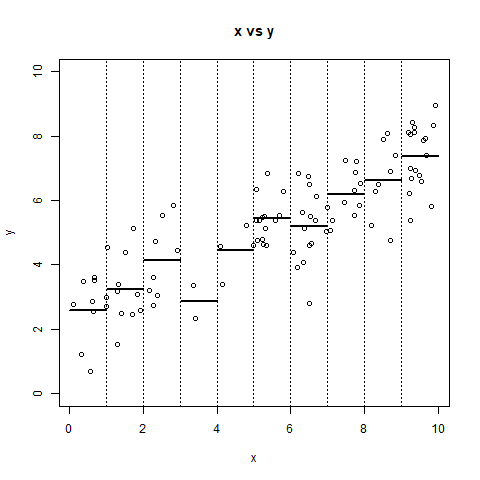

In [110]:
%%R
plot(x, y, ylim = c(0, 10), main = "x vs y" )
segments(0:9, y_local$x, 1:10, y_local$x, lwd = 2) ## segments 함수는 x좌표와 y좌표를 입력받아 line을 그려줌
abline(v = 1:9, lty = "dotted") ## abline 함수는 line을 그려줌, v는 수직선의 위치

`-` 참고: [abline 함수](https://www.rdocumentation.org/packages/graphics/versions/3.6.2/topics/abline)

`-` 참고: [segments 함수](https://www.rdocumentation.org/packages/graphics/versions/3.6.2/topics/segments)

## 응용 

`-` 나중에 + R입문 중간고사 내용도

# 8장 - 입출력(input and output)

`-` read.table\read.csv('파일 위치') ---> 텍스트 파일 or csv 파일을 읽어 내부 저장소에 dataframe으로 만듦

`-` getwd() ---> 현재의 작업 디렉토리를 알려줌

`-` setwd('위치') ---> 작업 디렉토리를 입력한 위치로 변경

`-` dir() ---> 현재 작업 디렉토리에 있는 파일들의 리스트를 보여줌

`-` write.table\write.csv()은 특정 데이터 프레임을 작업 디렉토리에 텍스트 파일 or csv 파일로 입력함

`-` 파일을 읽을 때 stringAdFactors = F 옵션을 적용하면 문자열 변수가 자동으로 factor 형이 되는 것을 막아줌

`-` sink()함수를 통해 결과값을 텍스트 파일로 저장할 수 있음 ---> [sink function](https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/sink)

## scan()함수

`-` scan() ---> 비정형의 문자열 데이터를 읽을 때 유용

`-` what 은 읽어 들일 데이터 값 형식 numeric, logical, character

`-` 책 따라 하는데 scan함수가 제대로 작동되지 않아 찾아보니 quote = "" 로 하지 않아서라고 함 ---> 참고: [https://pythonq.com/so/r/29317](https://pythonq.com/so/r/29317)

`-` quote = "" 옵션을 적용하지 않으면 Read 1 item을 반환 ---> 빈칸을 기준으로 문자열을 쪼개지 않았다는 뜻 ---> 그런데 sep = "\n" 으로 하면 Read 20 item임

`-` 원인을 알았는데 내가 yesterday노래 가사 텍스트 파일을 만들 때 맨 앞에 " 기호를 실수로 추가했었음 ---> " 기호를 없애니 잘 동작함

In [8]:
%%R
lyrics <- scan("yesterday.txt", what = "character") ## quote = "" 옵션을 적용 안해도 잘 동작함

R[write to console]: Read 126 items



In [9]:
%%R 
str(lyrics) 

 chr [1:126] "Yesterday," "all" "my" "troubles" "seemed" "so" "far" "away." ...


In [10]:
%%R
head(lyrics, 10)

 [1] "Yesterday," "all"        "my"         "troubles"   "seemed"    
 [6] "so"         "far"        "away."      "Now"        "it"        


`-` 빈칸을 구분자로 인식하여 문자열을 쪼개어 읽어옴 + 줄 단위로 읽고 싶다면 sep = "\n"

In [11]:
%%R
lyrics_2 <- scan("yesterday.txt", what = "character", sep = "\n")

R[write to console]: Read 20 items



In [12]:
%%R
str(lyrics_2)

 chr [1:20] "Yesterday, all my troubles seemed so far away." ...


In [13]:
%%R
head(lyrics_2, 5)

[1] "Yesterday, all my troubles seemed so far away."
[2] "Now it looks as though they're here to stay."  
[3] "oh, I believe in yesterday."                   
[4] "Suddenly, I'm not half the man I used to be."  
[5] "There's a shadow hanging over me."             


## cat() 함수

`-` print함수와 비슷하나 여러개의 출력이 가능하고 출력이 공백 없이 이어짐

In [71]:
%%R
print("a")
print("b")

[1] "a"
[1] "b"


In [72]:
%%R
cat("a")
cat("b")

ab

# 9장 - 문자열 작업

## grep() 함수 

`-` grep(pattern, x)는 x에서 pattern이 있는 곳을 알려줌

In [14]:
%%R
grep("Yesterday", lyrics)

[1]   1  63 105


In [15]:
%%R
grep("yesterday", lyrics)

[1]  22  40  62  84 104 126


`-` "Yesterday"는 1 ,63 ,105번째 요소에 있고 "yesterday"는 22, 40 ,62, 84, 104, 126번째 요소에 있음을 알려줌

`-` 이번에는 "?"를 찾아보자

`-` grep("?", lyrics)를 하면 될 것 같지만 아님

In [16]:
%%R  #collapse-output

grep("?", lyrics) # %%R 셀에서는 collapse-output이 안됨......(아님말고)

  [1]   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
 [19]  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
 [37]  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
 [55]  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
 [73]  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
 [91]  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
[109] 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126


`-` "?"는 정규표현식 기호로 사용되게 원래의 물음표 기호를 사용하고자 하면 "\\"을 앞에 넣어줘야함 ---> 나중에 정규표현식 공부하자

In [17]:
%%R
grep("\\?", lyrics)

[1] 47 89


## nchar() 함수 

`-` nchar(x)는 문자열 x의 길이를 알려줌(빈칸 포함)

In [136]:
%%R
nchar("yesterday")

[1] 9


`-` 문자열 벡터에도 적용 가능함

In [18]:
%%R
nchar(lyrics)

  [1] 10  3  2  8  6  2  3  5  3  2  5  2  6  7  4  2  5  3  1  7  2 10  9  3  3
 [26]  4  3  3  1  4  2  3  7  1  6  7  4  3  3  9  4  9  3  3  3  2  3  1  5  5
 [51]  3  8  4  1  4  9  6  3  1  4  3 10  9  4  3  4  2  4  4  2  5  3  1  4  1
 [76]  5  2  4  5  3  1  7  2 10  3  3  3  2  3  1  5  5  3  8  4  1  4  9  6  3
[101]  1  4  3 10  9  4  3  4  2  4  4  2  5  3  1  4  1  5  2  4  5  3  1  7  2
[126] 12
